# Get map from folium

In [1]:
import numpy as np
import pandas as pd
import folium

In [2]:
m = folium.Map(location=(13.7265612,100.6042607), zoom_start=11)

# Get hotel list

In [3]:
import json

from urllib.request import Request, urlopen

In [4]:
import pickle

datapath = '../processed_data/'

data_static = pickle.load(open(datapath + 'data_static_21_13.pickle','rb'))
data_vary = pickle.load(open(datapath + 'data_vary_21_13.pickle','rb'))

In [5]:
df = pd.DataFrame(data_static)

In [6]:
# check if string is valid
def is_valid(s):
    try:
        s.encode('ascii')
        return True
    except:
        return False

In [7]:
hotel_name_dict = df['hotel_name'].to_dict()
keys = hotel_name_dict.keys()
hotel_name_list = np.array([hotel_name_dict[i] for i in range(max(keys)) if hotel_name_dict[i]!=None and is_valid(hotel_name_dict[i])])

print(hotel_name_list)

['The Bedroom Ladprao 101' 'Nasa Vegas Hotel' 'Romance Hotel Bangna' ...
 'Teja Lake View Apartments' 'Baan Sathorn River and Pool view'
 'Donmuang - Impact Condo Service']


# Get latitude, longitude of every hotels

In [8]:
df_geom_raw = pd.read_csv(datapath + 'hotel_geometry_2.csv', index_col=0)
print(df_geom_raw.shape)
df_geom_raw.head()

(1105, 2)


,lat,long
Light Jatujak Hostel,13.812394,100.561161
Asoke Suites,13.735743,100.561970
Don Mueang Airport Modern Bangkok,13.925016,100.600049
Klassique Sukhumvit,13.710497,100.598220
Mercure Bangkok Siam,13.746724,100.528938


In [9]:
# tooltip = 'Click me!'

# for i in range(df_geom.shape[0]):
#     hotel_name = df_geom.index[i]
#     lat = df_geom.loc[hotel_name, 'lat']
#     long = df_geom.loc[hotel_name, 'long']
#     folium.Marker([lat, long], popup='<i>{}</i>'.format(hotel_name)).add_to(m)

In [10]:
# m

# Get all hotel names from raw data

In [11]:
csv_path = datapath + 'uncleaned_data.csv'
df_raw = pd.read_csv(csv_path, index_col=0)

df_raw.head()

,Unnamed: 0.1,hotel_id_in_our_database,hotel_name,hotel_location,hotel_star,hotel_location_rating,hotel_nearby_place_distance,hotel_popular_place_distance,hotel_user_Ratings,hotel_user_Ratings_text,...,Afternoon tea,Fruit basket,Limited laundry service,Food discount,Welcome drink,Club lounge access,Free room upgrade,Complimentary snacks,Free Breakfast,Late check-out
0,0,0,The Bedroom Ladprao 101,"99 Soi Ladprao 101 Ladprao Road Klongchan, Ban...",4.0,6.9,Foodland Lard Prao && 1.27 km ; Imperial World...,Terminal 21 Shopping Mall && 9.44 km ; Central...,8.1,Excellent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,The Bedroom Ladprao 101,"99 Soi Ladprao 101 Ladprao Road Klongchan, Ban...",4.0,6.9,Foodland Lard Prao && 1.27 km ; Imperial World...,Terminal 21 Shopping Mall && 9.44 km ; Central...,8.1,Excellent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,The Bedroom Ladprao 101,"99 Soi Ladprao 101 Ladprao Road Klongchan, Ban...",4.0,6.9,Foodland Lard Prao && 1.27 km ; Imperial World...,Terminal 21 Shopping Mall && 9.44 km ; Central...,8.1,Excellent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,The Bedroom Ladprao 101,"99 Soi Ladprao 101 Ladprao Road Klongchan, Ban...",4.0,6.9,Foodland Lard Prao && 1.27 km ; Imperial World...,Terminal 21 Shopping Mall && 9.44 km ; Central...,8.1,Excellent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,The Bedroom Ladprao 101,"99 Soi Ladprao 101 Ladprao Road Klongchan, Ban...",4.0,6.9,Foodland Lard Prao && 1.27 km ; Imperial World...,Terminal 21 Shopping Mall && 9.44 km ; Central...,8.1,Excellent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
cols = ['hotel_name', 'room_price']
filt = df_raw['room_price'].notnull()
df_price = df_raw[filt]

df_hotel = df_price.groupby(by='hotel_name')
price_dict = {}

for grp in df_hotel:
    df_grp = df_hotel.get_group(grp[0])
    avg_price_i = df_grp['room_price'].mean()

    hotel_name = grp[0].strip(' ')
    price_dict[hotel_name] = avg_price_i

In [13]:
df_avg_price = pd.DataFrame.from_dict(price_dict, orient='index', columns=['avg_price'])
df_avg_price = df_avg_price.reset_index()
df_avg_price = df_avg_price.rename(columns={
    'index': 'hotel_name'
})

In [14]:
df_avg_price.to_csv(datapath + 'avg_price.csv')
df_avg_price.head()

,hotel_name,avg_price
0,Kamin Bird Hostel,308.625000
1,128 Bangkok,1217.500000
2,12th Avenue Hotel Bangkok,2539.040816
3,130 Hotel & Residence Bangkok,941.000000
4,137 Pillars Residences Bangkok,9627.000000


In [16]:
from decimal import *
getcontext().prec = 7

df_geom = df_geom_raw.reset_index()
df_geom = df_geom.rename(columns={
    'index': 'hotel_name'
})
for i in range(df_geom.shape[0]):
    lat = round(df_geom.loc[i, 'lat'], 7)
    long = round(df_geom.loc[i, 'long'], 7)
    df_geom.loc[i, 'coordinate'] = '[{}, {}]'.format(long, lat)

df_geom['coordinate'] = df_geom['coordinate'].astype(str)
df_geom = df_geom.sort_values(by=['hotel_name'])
df_geom = df_geom.reset_index(drop=True)
df_geom.head()

,hotel_name,lat,long,coordinate
0,(Dwella Suvarnabhumi Hotel),13.711619,100.734916,"[100.7349159, 13.7116186]"
1,1150 Villa Apartment Bangkok,13.699445,100.527237,"[100.5272373, 13.6994455]"
2,128 Thai Massage,13.741771,100.553346,"[100.5533464, 13.741771]"
3,12th Avenue Hotel Bangkok,13.734551,100.557838,"[100.5578375, 13.7345505]"
4,130 Hotel & Residence Bangkok โรงแรม วันเทอร์ต...,13.771770,100.632121,"[100.632121, 13.77177]"


In [17]:
for i, name in enumerate(df_geom['hotel_name']):
    for j, h_name in enumerate(df_avg_price['hotel_name']):
        if(name==h_name):
            df_geom.loc[i, 'avg_price'] = df_avg_price.loc[j, 'avg_price']

In [18]:
filt = df_geom['avg_price'].notnull()
df_geom_idx = df_geom[filt].reset_index(drop=True)
df_geom_idx.to_csv(datapath + 'average_price_2.csv')
df_geom_idx.head()

,hotel_name,lat,long,coordinate,avg_price
0,12th Avenue Hotel Bangkok,13.734551,100.557838,"[100.5578375, 13.7345505]",2539.040816
1,1Sabai Hostel,13.739673,100.565430,"[100.5654298, 13.7396727]",1020.750000
2,2Bedtel,13.741430,100.619223,"[100.6192233, 13.74143]",1019.000000
3,2W Bed & Breakfast Bangkok,13.738716,100.514602,"[100.5146016, 13.7387164]",663.500000
4,39 Boulevard Executive Residence,13.737394,100.569856,"[100.5698562, 13.7373942]",2862.782609


# Plot hotel markers on folium

In [20]:
import os

geojson_path = '/Users/Indy/Desktop/coding/HotelPricePrediction/processed_data/hotel_bkk.geojson'

hotel_geo = os.path.join('data', geojson_path)

csv_path = '/Users/Indy/Desktop/coding/HotelPricePrediction/processed_data/average_price_2.csv'
data_path = os.path.join('data', csv_path)
avg_price_df = pd.read_csv(data_path)
avg_price_df = avg_price_df.rename(columns={
    'Unnamed: 0': 'id'
})

In [22]:
def get_dict(h_name_list, coord_list, length):
    place_type = 'Lodging'
    geom_type = 'Point'

    geom_dict = {
      'type': [place_type for i in range(length)],
      'geometry': {
          'type': [geom_type for i in range(length)],
          'coordinates': coord_list
      },
      'properties': {
          'name': h_name_list
      }
    }

    return geom_dict

with open(datapath + 'hotel_bkk.geojson', 'w') as outfile:
    h_name_list = []
    coord_list = []
    for i in range(avg_price_df.shape[0]):
        hotel_name = i
        lat = avg_price_df.loc[i, 'lat']
        long = avg_price_df.loc[i, 'long']
        
        h_name_list.append(hotel_name)
        coord_list.append([lat, long])
    
    geom_dict = get_dict(h_name_list, coord_list, len(h_name_list))
#     print(geom_dict)
    geom_json = json.dump(geom_dict, outfile)

In [23]:
import matplotlib.pyplot as plt

print(avg_price_df['avg_price'].max())
avg_price_df['avg_price'].hist(bins=100)
plt.show()

avg_price_df['avg_price'].describe()

28292.506329113927


<Figure size 640x480 with 1 Axes>

count      524.000000
mean      2316.943166
std       2562.707471
min        162.000000
25%        919.875000
50%       1481.370833
75%       2682.648990
max      28292.506329
Name: avg_price, dtype: float64

In [85]:
import matplotlib

def get_color(ratio, cmap='Blues'):
    cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    colors = cmap.get_cmap()

    rgba = c(ratio)
    rgba2 = [int(256*x) for x in rgba][:-1]
    hexcode = '#{:02x}{:02x}{:02x}'.format( rgba2[0], rgba2[1] , rgba2[2] )
    
    return hexcode

In [103]:
max_price = avg_price_df['avg_price'].max()
max_log_price = np.log1p(avg_price_df['avg_price'].max())

color_1 = '#FDFEFF'
# color_2 = '#2493F5'
color_2 = '#1FAEEC'
colors = ['#f1eef6','#bdc9e1','#74a9cf','#0570b0']
price_range = [[150,650],[650,1150],[1482,2683],[2683,max_price]]

m = folium.Map(location=(13.7265612,100.6042607), zoom_start=11)

for i in range(avg_price_df.shape[0]):
    hotel_name = avg_price_df.loc[i, 'hotel_name']
    lat = avg_price_df.loc[i, 'lat']
    long = avg_price_df.loc[i, 'long']
    price = avg_price_df.loc[i, 'avg_price']
    c_value = price/max_price
    
    for i, r in enumerate(price_range):
        if(price>=r[0] and price<r[1]):
            folium.CircleMarker(
                location=[lat, long],
                radius=4+(price-100)/1200,
                color='grey',
                fill=True,
                fill_color=get_color(c_value),
                fill_opacity=1.0,
                popup='<i>{}</i>'.format(hotel_name)
            ).add_to(m)
            
            break

In [104]:
m

In [82]:
color_i = get_color(ratio=0.1)
print(color_i)

#e4eff9


In [83]:
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

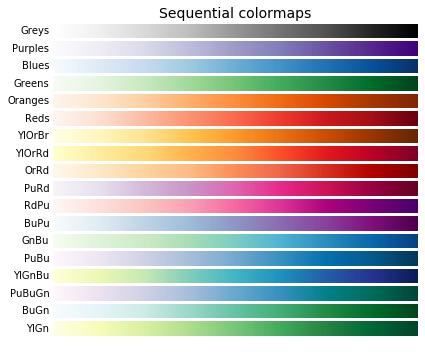

In [84]:
def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    if(cmap_category=='Sequential'):
        nrows = len(cmap_list)
        figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
        fig, axes = plt.subplots(nrows=nrows, figsize=(6.4, figh))
        fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

        axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

        for ax, name in zip(axes, cmap_list):
            ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
            ax.text(-.01, .5, name, va='center', ha='right', fontsize=10,
                    transform=ax.transAxes)

        # Turn off *all* ticks & spines, not just the ones with colormaps.
        for ax in axes:
            ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()

# Keep

## Get hotel location data from Google API

In [ ]:
api_key = YOUR_API_KEY

headers = {
    'Content-Type': 'application/json; charset=utf-8',
    'User-agent': 'Mozilla/5.0'
}

result_list = []

for place_name in hotel_name_list:
    place_name_2 = place_name.replace(' ', '%20')

    map_api_url = 'https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input={}&inputtype=textquery&fields=type,name,geometry&key={}'.format(place_name_2, api_key)

    req = Request(url=map_api_url)
    req.add_header('Content-Type', 'application/json')

    res = urlopen(req)

    results = res.read()

    result_list.append(results)

In [ ]:
def insert_to_dict(res_json):
    location = res_json['candidates'][0]['geometry']['location']
    lat = location['lat']
    long = location['lng']

    if(lat>=13 and lat<=14 and long>=100 and long<=101):
        return lat, long

In [ ]:
hotel_geom = {}

cnt = 0

for result in result_list:
#   print(result)
  try:
    result = result.decode('ascii')
    
    res_json = json.loads(result)
    lat, long = insert_to_dict(res_json)
    
    hotel_name = res_json['candidates'][0]['name']
    hotel_geom[hotel_name] = [lat, long]
    print(hotel_name)
    
    except:
        try:
            result = result.decode('utf-8')
            res_json = json.loads(result)
            lat, long = insert_to_dict(res_json)

            hotel_name = res_json['candidates'][0]['name']
            hotel_geom[hotel_name] = [lat, long]
    except:
        cnt += 1
        print('error')

In [ ]:
df_hotel_geom = pd.DataFrame.from_dict(hotel_geom, orient='index', columns=['lat','long'])
df_hotel_geom.to_csv('hotel_geometry.csv')